# Happiness and Freedom of Movement

* People in land-locked countries are less happy than others considering all other factors.
* People in countries with reduced religious freedom and women's moveement are less happy than others.


In [4]:
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlalchemy as sa

# create sqlite database and path

from sqlalchemy import create_engine
engine = create_engine('sqlite:///HappyMovement.db')

# code for multiple outputs from single cell (ref: https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs?noredirect=1&lq=1)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
# create dataframe from csv

hfi_file = pd.read_csv("hfi_cc_2018.csv")

whr_file = pd.read_csv("whr_2017.csv")

hfi = pd.DataFrame(hfi_file)

whr = pd.DataFrame(whr_file)

# create database and tables from dataframe

hfi.to_sql("Human Freedom Index", con=engine)

whr.to_sql("World Happiness Report", con=engine)

# pull data from database to confirm successful creation

select_hfi = "SELECT * FROM 'Human Freedom Index' LIMIT 5"

select_whr = "SELECT * FROM 'World Happiness Report' LIMIT 5"

# pd.read_sql provides better formatting

pd.read_sql(select_hfi, con=engine)

pd.read_sql(select_whr, con=engine)

,index,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0


,index,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [8]:
hfi.info()

hfi.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Columns: 123 entries, year to hf_quartile
dtypes: float64(119), int64(1), object(3)
memory usage: 1.4+ MB


,year,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
count,1458.000000,880.000000,880.000000,880.000000,1378.000000,1378.000000,1369.000000,1378.000000,1279.000000,1378.000000,...,1283.000000,1357.000000,1368.000000,1374.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000
mean,2012.000000,5.589355,5.474770,5.044070,5.309641,7.412980,8.341855,9.519458,6.772869,9.584972,...,4.886192,7.698494,6.981858,6.317668,7.019782,6.785610,76.973149,6.993444,77.007983,2.490566
std,2.582875,2.080957,1.428494,1.724886,1.529310,2.832947,3.225902,1.744673,2.768983,1.559826,...,1.889168,1.728507,1.979200,1.230988,1.027625,0.883601,44.540142,1.025811,44.506549,1.119698
min,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.009841,2.483540,2.880000,1.000000,3.765827,1.000000,1.000000
25%,2010.000000,4.133333,4.549550,3.789724,4.131746,6.386978,10.000000,10.000000,5.000000,9.942607,...,3.433786,6.874687,6.368178,5.591851,6.429498,6.250000,38.000000,6.336685,39.000000,1.000000
50%,2012.000000,5.300000,5.300000,4.575189,4.910797,8.638278,10.000000,10.000000,7.500000,10.000000,...,4.418371,8.074161,7.466692,6.265234,7.082075,6.900000,77.000000,6.923840,76.000000,2.000000
75%,2014.000000,7.389499,6.410975,6.400000,6.513178,9.454402,10.000000,10.000000,10.000000,10.000000,...,6.227978,8.991882,8.209310,7.139718,7.720955,7.410000,115.000000,7.894660,115.000000,3.000000
max,2016.000000,9.700000,8.773533,8.719848,8.723094,9.926568,10.000000,10.000000,10.000000,10.000000,...,9.623811,9.999638,9.865488,9.272600,9.439828,9.190000,162.000000,9.126313,162.000000,4.000000


In [9]:
whr.info()

whr.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.6+ KB


,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [11]:
# get list of land locked countries
land_locked_countries = ["Afghanistan", "Andorra", "Armenia", "Artsakh", "Austria", "Azerbaijan", "Belarus", "Bhutan", "Bolivia", "Botswana", "Burkina Faso", "Burundi", "Central African Republic", "Chad", "Czech Republic", "Ethiopia", "Hungary","Kazakhstan", "Kosovo", "Kyrgyzstan", "Laos", "Lesotho", "Liechtenstein", "Luxembourg", "Macedonia", "Malawi", "Mali", "Moldova", "Mongolia", "Nepal", "Niger", "Paraguay", "Rwanda", "San Marino" , "Serbia", "Slovakia", "South Ossetia", "South Sudan", "Swaziland", "Switzerland","Tajikistan", "Transnistria", "Turkmenistan", "Uganda", "Uzbekistan","Vatican City", "West Bank", "Zambia", "Zimbabwe"]

# sanity check
print("Armenia" in land_locked_countries)

True


In [54]:
# get list of countries from hfi

# hfi["countries"].head(20)

# select only land locked countries from dataframe (ref: https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas)

land_locked_happiness = hfi.loc[hfi['countries'].isin(land_locked_countries)]

land_locked_happiness.describe()

,year,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
count,288.000000,149.000000,149.000000,149.000000,265.000000,265.000000,265.000000,265.000000,254.000000,265.000000,...,254.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000
mean,2012.000000,4.614025,4.918915,4.522348,4.854165,7.565477,8.735849,9.486909,6.318898,9.750451,...,4.366538,7.307158,7.079935,6.113748,6.982809,6.620189,87.358491,6.797110,86.215094,2.777358
std,2.586483,1.727505,1.267188,1.458681,1.292421,2.253214,2.538722,1.597826,2.436481,1.006332,...,1.702717,2.076030,1.973745,1.172821,0.955940,0.805318,41.708628,0.887382,39.794393,1.003524
min,2008.000000,0.000000,0.000000,0.000000,2.900353,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.935150,0.000000,0.000000,2.814937,3.611441,4.460000,4.000000,4.909415,2.000000,1.000000
25%,2010.000000,4.000000,4.296302,3.756227,4.050746,6.432548,10.000000,10.000000,5.000000,9.916701,...,3.108613,6.566583,6.872598,5.605428,6.467366,6.030000,55.000000,6.206026,62.000000,2.000000
50%,2012.000000,4.500000,4.857372,4.442161,4.600000,8.192027,10.000000,10.000000,7.500000,10.000000,...,4.037885,7.831044,7.444274,6.076665,7.058349,6.650000,92.000000,6.773827,87.000000,3.000000
75%,2014.000000,5.166667,5.508207,5.177519,5.187302,9.322814,10.000000,10.000000,7.500000,10.000000,...,5.039348,8.769327,8.240136,6.774170,7.648912,7.240000,125.000000,7.229333,119.000000,4.000000
max,2016.000000,9.373309,8.027585,8.331509,8.577468,9.926568,10.000000,10.000000,10.000000,10.000000,...,9.033084,9.808312,9.383487,8.347601,8.684989,8.390000,153.000000,8.818141,154.000000,4.000000


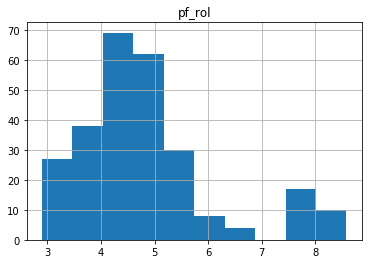

In [61]:
land_locked_happiness.hist(column="pf_rol")

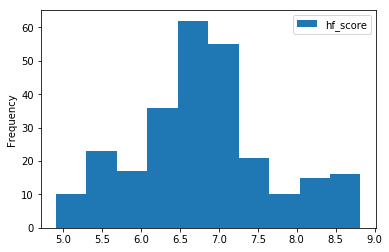

In [64]:
land_locked_happiness.plot(x="pf_rol", y="hf_score", kind="hist")